# Open Data Cincinnati Safety Project

* Export data from Open Data Cincinnati Safety Project around Traffic Crashes
* Establish connection from API
* Build out Map using visualization tools for 

## Source of Information
https://data.cincinnati-oh.gov/safety/Traffic-Crash-Reports-CPD-/rvmt-pkmq

## Approaches for Pulling Down the Data:
* Large Data Dump export and load into CSV File (handles full list in one setting, effective for basic needs)
* API limited to 1000 for the intial record or 2000 using an API token. Should avoid setting off flags if I need to export the records

In [55]:
# Packages for Notebook
import requests
import pandas as pd

#Setting for Matplotlib for inline mapping
%matplotlib inline

In [50]:
# Process for this code takes the first 1000 records that are listed in the exported file. Using this for intial design and basic exploration of dataset

url = r'https://data.cincinnati-oh.gov/resource/rvmt-pkmq.json'
r = requests.get(url)
df = pd.read_json(r.content)
df.insert(loc=8, column='crashlocation', value='')
df

,address_x,latitude_x,longitude_x,age,community_council_neighborhood,cpd_neighborhood,sna_neighborhood,crashdate,crashlocation,crashseverity,...,mannerofcrash,roadconditionsprimary,roadcontour,roadsurface,unittype,typeofperson,weather,zip,roadclass,roadclassdesc
0,36XX EDWARDS RD,34.144100,-84.443480,32.0,N/A,N/A,N/A,2022-03-14T22:20:00.000,,5 - PROPERTY DAMAGE ONLY,...,"7 - SIDESWIPE, SAME DIRECTION",01 - DRY,1 - STRAIGHT LEVEL,"2 - BLACKTOP, BITUMINOUS, ASPHALT",01 - PASSENGER CAR,D - DRIVER,1 - CLEAR,45208.0,NaN,NaN
1,36XX BORDEN ST,39.153143,-84.549439,32.0,SOUTH CUMMINSVILLE,S.. CUMMINSVILLE,SOUTH CUMMINSVILLE,2022-03-14T15:20:00.000,,5 - PROPERTY DAMAGE ONLY,...,1 - NOT COLLISION BETWEEN TWO MOTOR VEHICLES I...,01 - DRY,1 - STRAIGHT LEVEL,"2 - BLACKTOP, BITUMINOUS, ASPHALT",01 - PASSENGER CAR,D - DRIVER,1 - CLEAR,45223.0,NaN,NaN
2,36XX BORDEN ST,39.151603,-84.548479,32.0,SOUTH CUMMINSVILLE,S.. CUMMINSVILLE,SOUTH CUMMINSVILLE,2022-03-14T22:10:00.000,,5 - PROPERTY DAMAGE ONLY,...,1 - NOT COLLISION BETWEEN TWO MOTOR VEHICLES I...,01 - DRY,1 - STRAIGHT LEVEL,"2 - BLACKTOP, BITUMINOUS, ASPHALT",01 - PASSENGER CAR,D - DRIVER,1 - CLEAR,45223.0,NaN,NaN
3,10XX SYCAMORE ST,39.106127,-84.509913,37.0,DOWNTOWN,C. B. D. / RIVERFRONT,DOWNTOWN,2022-03-14T21:28:00.000,,5 - PROPERTY DAMAGE ONLY,...,1 - NOT COLLISION BETWEEN TWO MOTOR VEHICLES I...,01 - DRY,1 - STRAIGHT LEVEL,1 - CONCRETE,03 - SPORT UTILITY VEHICLE,D - DRIVER,1 - CLEAR,45202.0,2.0,Major Arterial Roads
4,57XX GLENWAY AV,39.135275,-84.612241,36.0,WESTWOOD,WESTWOOD,WESTWOOD,2022-03-14T21:17:00.000,,5 - PROPERTY DAMAGE ONLY,...,2 - REAR-END,01 - DRY,1 - STRAIGHT LEVEL,"2 - BLACKTOP, BITUMINOUS, ASPHALT",01 - PASSENGER CAR,D - DRIVER,1 - CLEAR,45238.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,N I71 AT 0-8 MM,39.097771,-84.511235,36.0,DOWNTOWN,C. B. D. / RIVERFRONT,DOWNTOWN,2022-03-03T15:41:00.000,,3 - MINOR INJURY SUSPECTED,...,2 - REAR-END,01 - DRY,2 - STRAIGHT GRADE,"2 - BLACKTOP, BITUMINOUS, ASPHALT",01 - PASSENGER CAR,D - DRIVER,2 - CLOUDY,45202.0,1.0,Interstate Highways
996,N I71 AT 0-8 MM,39.097251,-84.511355,33.0,DOWNTOWN,C. B. D. / RIVERFRONT,DOWNTOWN,2022-03-03T15:41:00.000,,3 - MINOR INJURY SUSPECTED,...,2 - REAR-END,01 - DRY,2 - STRAIGHT GRADE,"2 - BLACKTOP, BITUMINOUS, ASPHALT",01 - PASSENGER CAR,O - OCCUPANT,2 - CLOUDY,45202.0,1.0,Interstate Highways
997,N I71 AT 0-8 MM,39.097441,-84.512825,14.0,DOWNTOWN,C. B. D. / RIVERFRONT,DOWNTOWN,2022-03-03T15:41:00.000,,3 - MINOR INJURY SUSPECTED,...,2 - REAR-END,01 - DRY,2 - STRAIGHT GRADE,"2 - BLACKTOP, BITUMINOUS, ASPHALT",01 - PASSENGER CAR,O - OCCUPANT,2 - CLOUDY,45202.0,1.0,Interstate Highways
998,11XX HOPPLE,39.136171,-84.541203,52.0,CAMP WASHINGTON,CAMP WASHINGTON,CAMP WASHINGTON,2022-03-03T15:38:00.000,,5 - PROPERTY DAMAGE ONLY,...,2 - REAR-END,01 - DRY,1 - STRAIGHT LEVEL,"2 - BLACKTOP, BITUMINOUS, ASPHALT",01 - PASSENGER CAR,D - DRIVER,1 - CLEAR,45225.0,3.0,Minor Arterial Roads


In [86]:
df = pd.read_csv('.\datasets\Traffic_Crash_Reports__CPD_ .csv')
df.columns = ['address_x', 'latitude_x', 'longitude_x', 'age',
       'community_council_neighborhood', 'cpd_neighborhood',
       'sna_neighborhood', 'crashdate', 'crashlocation','crashseverity', 'crashseverityid',
       'datecrashreported', 'dayofweek', 'gender', 'injuries', 'instanceid',
       'lightconditionsprimary', 'localreportno', 'mannerofcrash',
       'roadconditionsprimary', 'roadcontour', 'roadsurface', 'unittype',
       'typeofperson', 'weather', 'zip', 'roadclass', 'roadclassdesc']


C:\Users\Jon\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (8,27) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [57]:
#Identify number of neighborhoods that are related to the content
pd.Series({c: len(df[c].unique()) for c in df})


address_x                          13132
latitude_x                         99687
longitude_x                       135860
age                                  118
community_council_neighborhood        72
cpd_neighborhood                      54
sna_neighborhood                      51
crashdate                         145950
crashlocation                         14
crashseverity                          9
crashseverityid                        9
datecrashreported                 149198
dayofweek                              8
gender                                 6
injuries                              11
instanceid                        153731
lightconditionsprimary                15
localreportno                     153731
mannerofcrash                         10
roadconditionsprimary                 12
roadcontour                            6
roadsurface                            9
unittype                              12
typeofperson                          12
weather         

In [76]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 296527 entries, 0 to 296526
Data columns (total 29 columns):
 #   Column                          Non-Null Count   Dtype   
---  ------                          --------------   -----   
 0   address_x                       296510 non-null  object  
 1   latitude_x                      296504 non-null  float64 
 2   longitude_x                     296501 non-null  float64 
 3   age                             260349 non-null  float64 
 4   community_council_neighborhood  290195 non-null  object  
 5   cpd_neighborhood                290145 non-null  object  
 6   sna_neighborhood                290115 non-null  object  
 7   crashdate                       296511 non-null  object  
 8   crashlocation                   194022 non-null  object  
 9   crashseverity                   296522 non-null  object  
 10  crashseverityid                 296522 non-null  float64 
 11  datecrashreported               296511 non-null  object  
 12  da

In [77]:
# Function to see overall breakdown for non-categorical data.
df.describe()

,latitude_x,longitude_x,age,crashseverityid,localreportno,unittype
count,2.965040e+05,2.965010e+05,260349.000000,296522.000000,2.965270e+05,185416.000000
mean,3.177541e+03,-1.384691e+04,37.520770,69859.669711,1.800862e+08,2.823149
std,1.550456e+06,7.181341e+06,16.440467,96043.115959,8.081925e+08,1.491172
min,-8.449036e+01,-3.908552e+09,0.000000,1.000000,1.400000e+01,0.000000
25%,3.911731e+01,-8.454930e+01,24.000000,3.000000,1.550126e+08,2.000000
50%,3.913655e+01,-8.451498e+01,34.000000,3.000000,1.750139e+08,2.000000
75%,3.916091e+01,-8.448480e+01,49.000000,201905.000000,1.950150e+08,4.000000
max,8.424329e+08,1.000000e-03,123.000000,201905.000000,2.201140e+11,10.000000


## Data Cleanup
The following code block will focus on the adding and modifying current fields so the categorical data will be either purged, combined, or cleaned for overall processing. 

---

### Cleaned Data Includes:
* Gender - Combine Male and Female fields with M - Male and F - Female respectively

In [87]:
# Remove duplicate gender values
df['gender'] = df['gender'].str.upper().map({'M - MALE' : 'MALE', 'F - FEMALE' : 'FEMALE'})

# Age Categorization goes here:

# TODO fix the categories as the range of data significantly increased.
df['age_group'] = pd.cut(df['age'], [0,19,31,45,64,100,1000], labels=['Youth (0-18)', 'Young Adult (19-30)', 'Middle Age Adult (31-45)', 'Pre-Retirement Adult (46-64)', 'Eldery(65-100)','Uncategorized'])

In [88]:
df['gender'].unique()

array(['MALE', 'FEMALE', nan], dtype=object)

<AxesSubplot:>

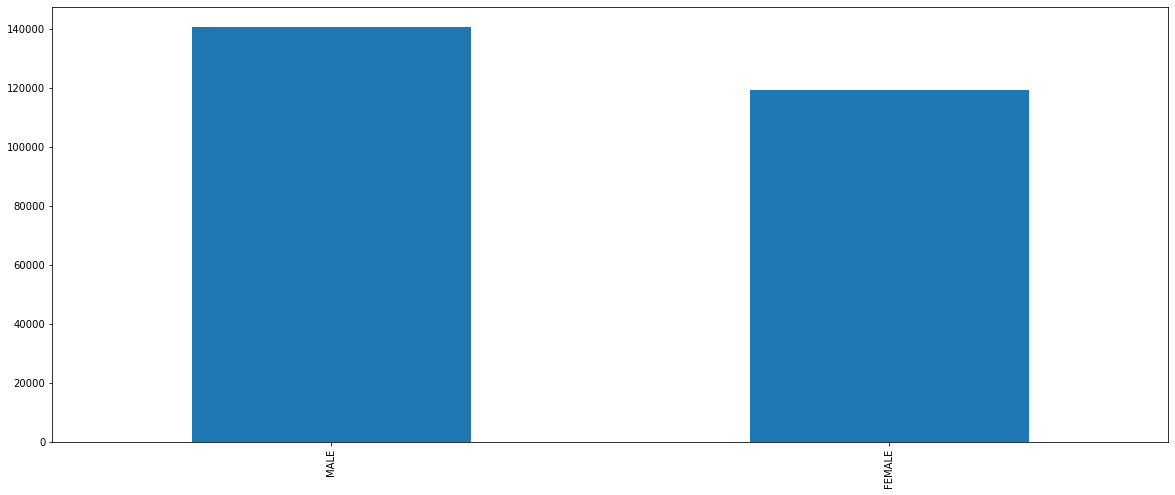

In [89]:
# df.plot(x="longitude_x", y="latitude_x", kind="scatter", c="age", colormap="YlOrRd")
# df.info()
import matplotlib.pyplot as plt

# Categorically set age groups into smaller subsets to plot
test = df[df['age'] > 0]
test['gender'].value_counts().plot(kind='bar',figsize=(20,8))

<AxesSubplot:>

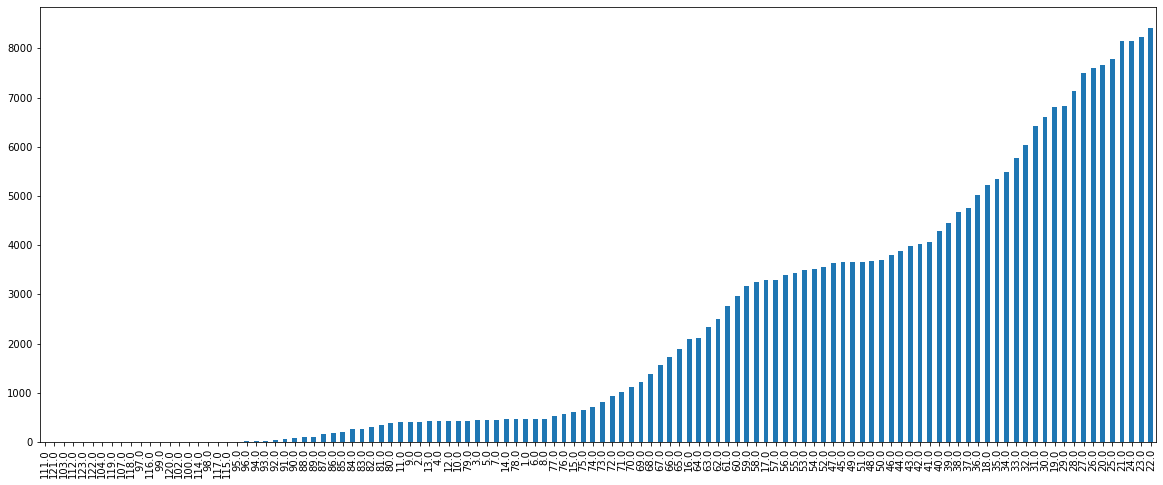

In [90]:
## TODO Figure out how to sort on column values 


test['age'].value_counts().sort_values().plot(kind='bar',figsize=(20,8))
# df.reindex(sorted(df.columns), axis=1)

## Day 2/3 Objectives:
* Built out Categorical Plots with grouped data.
    * Group Age into 5 categories (Youth (0-18), Young Adult (19-30), Middle Age Adult (31-55), Eldery(56-90)
    * Group Neighborhoods into regions of the City
* Create distribution plot for age, gender, and neighborhood.
* Which days of week were more dangerous for crimes?

In [91]:

# Grabs the count of unique values for each field with respective values
pd.Series({c: len(df[c].unique()) for c in df})

address_x                          13132
latitude_x                         99687
longitude_x                       135860
age                                  118
community_council_neighborhood        72
cpd_neighborhood                      54
sna_neighborhood                      51
crashdate                         145950
crashlocation                         14
crashseverity                          9
crashseverityid                        9
datecrashreported                 149198
dayofweek                              8
gender                                 3
injuries                              11
instanceid                        153731
lightconditionsprimary                15
localreportno                     153731
mannerofcrash                         10
roadconditionsprimary                 12
roadcontour                            6
roadsurface                            9
unittype                              12
typeofperson                          12
weather         

In [92]:
#Pivot Table to show the breakdown of age groups by neighbor hood data

df.pivot_table(values='age',index='cpd_neighborhood', columns='age_group', aggfunc='count', margins=True)

age_group,Youth (0-18),Young Adult (19-30),Middle Age Adult (31-45),Pre-Retirement Adult (46-64),Eldery(65-100),Uncategorized,All
cpd_neighborhood,,,,,,,
AVONDALE,907,3569,2596,2429,602,2,10105
BONDHILL,939,3743,2939,2967,753,3,11344
C. B. D. / RIVERFRONT,1080,6283,5128,5035,1113,3,18642
CALIFORNIA,97,347,297,328,89,0,1158
CAMP WASHINGTON,775,3465,2489,2562,578,0,9869
CARTHAGE,342,1225,1051,1094,293,2,4007
CLIFTON,826,3609,2321,2130,648,1,9535
CLIFTON/UNIVERSITY HEIGHTS,691,2681,1090,997,266,2,5727
COLLEGE HILL,876,2018,1532,1423,522,3,6374


In [93]:
df['age_group'] = pd.cut(df['age'], [0,19,31,55,90], labels=['Youth (0-18)', 'Young Adult (19-30)', 'Middle Age Adult (31-55)', 'Eldery(56-90)'])
df.pivot_table(values='age',index='cpd_neighborhood', columns='age_group', aggfunc='count', margins=True)

age_group,Youth (0-18),Young Adult (19-30),Middle Age Adult (31-55),Eldery(56-90),All
cpd_neighborhood,,,,,
AVONDALE,907,3569,4000,1624,10100
BONDHILL,939,3743,4625,2030,11337
C. B. D. / RIVERFRONT,1080,6283,8136,3129,18628
CALIFORNIA,97,347,497,217,1158
CAMP WASHINGTON,775,3465,4014,1613,9867
CARTHAGE,342,1225,1696,735,3998
CLIFTON,826,3609,3585,1507,9527
CLIFTON/UNIVERSITY HEIGHTS,691,2681,1692,661,5725
COLLEGE HILL,876,2018,2331,1134,6359


In [99]:
df.pivot_table(values='age',index=['cpd_neighborhood','crashseverity'], columns='gender', aggfunc='count', margins=True).fillna(0)


gender                                             FEMALE      MALE     All
cpd_neighborhood crashseverity                                             
AVONDALE         1 - FATAL                            4.0       3.0       7
                 1 - FATAL INJURY                     4.0       6.0      10
                 2 - INJURY                        1041.0     974.0    2015
                 2 - SERIOUS INJURY SUSPECTED        18.0      41.0      59
                 3 - MINOR INJURY SUSPECTED         264.0     240.0     504
...                                                   ...       ...     ...
WINTON HILLS     3 - MINOR INJURY SUSPECTED         126.0     101.0     227
                 3 - PROPERTY DAMAGE ONLY (PDO)     517.0     559.0    1076
                 4 - INJURY POSSIBLE                 87.0      64.0     151
                 5 - PROPERTY DAMAGE ONLY           229.0     247.0     476
All                                              116812.0  137601.0  254413

[400 rows x 3 columns]